In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM, SimpleRNN
from keras.utils import np_utils # numpy의 utils와 동일

import os

In [2]:
# brew install graphviz
# pip3 install graphviz
# pip3 install pydot-ng
from keras.utils.vis_utils import plot_model # 그래프로 중간과정 확인가능
# https://keras.io/visualization/

In [2]:
# sample text
sample = "hihello"

char_set = list(set(sample)) # ['l', 'o', 'h', 'e', 'i']
# 사전을 이용하면 쉽게 글자와 숫자 mapping 가능
char_dic = {w: i for i, w in enumerate(char_set)} # 사전을 뒤집음

"""
char_dic : {'l': 0, 'o': 1, 'h': 2, 'e': 3, 'i': 4}
"""



"\nchar_dic : {'l': 0, 'o': 1, 'h': 2, 'e': 3, 'i': 4}\n"

In [19]:
x_str = sample[:-1] # 'hihell'
y_str = sample[1:] # 'ihello'
# print(x_str, y_str)

data_dim = len(char_set) # 5
timesteps = len(y_str) # 6
num_classes = len(char_set)# 5

x = [char_dic[c] for c in x_str] ## char to index # [2, 4, 2, 3, 0, 0]
y = [char_dic[c] for c in y_str] ## char to index # [4, 2, 3, 0, 0, 1]

## One-hot encoding
x = np_utils.to_categorical(x, num_classes = num_classes)
y = np_utils.to_categorical(y, num_classes = num_classes)
# print(x)
"""[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] """

# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
y = np.reshape(y, (-1, len(y), data_dim))
# print(x)
"""[[[0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]]"""

# print(x.shape) : (1, 6, 5)

In [21]:
# Simple _RNN 사용시 제약이 많음..

model = Sequential()
model.add(SimpleRNN(num_classes, input_shape=(timesteps, data_dim), return_sequences = True))  # input_shape : (6,5)
# num_classes : hidden layer의 node 수
# timestep ; 과거 데이터에 대한 것 
model.add(TimeDistributed(Dense(num_classes))) # 최신버전으로 바뀌면서 TimeDistributed 추가
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 6, 5)              55        
_________________________________________________________________
time_distributed_5 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_5 (Activation)    (None, 6, 5)              0         
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', metrics = ['accuracy'])  # 회귀를 할 때에는 metrics를 RMSE? 사용
# rmsprop은 시계열에서 많이 사용 # adam은 분류에서 많이 사용
model.fit(x, y, epochs=5) #  batch_size=1 
predictions = model.predict(x, verbose=0)

# 숫자를 다시 문자로 돌리기
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result = [char_set[j] for j in index]
    print(index, ''.join(result))

Epoch 1/5
1/1 [==============================] - 0s 382ms/step - loss: 1.7562 - acc: 0.1667
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 1.7512 - acc: 0.1667
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 1.7462 - acc: 0.1667
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 1.7413 - acc: 0.1667
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 1.7365 - acc: 0.1667
[[0.16655524 0.28427917 0.11302397 0.324578   0.11156364]
 [0.36167294 0.0750759  0.23975545 0.21382332 0.10967238]
 [0.15349741 0.30978507 0.06796031 0.3964685  0.07228872]
 [0.33626097 0.06022846 0.27185297 0.2141913  0.11746629]
 [0.17677839 0.19046547 0.10999009 0.3551078  0.16765827]
 [0.23450728 0.09842438 0.19353352 0.1769122  0.2966226 ]]
[2 4 2 0 3 3] hihell
[3 0 3 0 3 4] leleli


https://www.tensorflow.org/api_docs/python/tf/keras/initializers
초기값 설정



## LSTM 사용

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM, SimpleRNN
from keras.utils import np_utils

import os

from keras.utils.vis_utils import plot_model


sample ="hihello"

char_set=list(set(sample))
char_dic={w:i for i,w in enumerate(char_set)}

print(char_dic)


x_str=sample[:-1]
y_str=sample[1:]


data_dim=len(char_set)
timesteps=len(y_str)
num_classes=len(char_set)

print(x_str,y_str)


x=[char_dic[c] for c in x_str]
y=[char_dic[c] for c in y_str]

x=np_utils.to_categorical(x,num_classes=num_classes)
y=np_utils.to_categorical(y,num_classes=num_classes)

x=np.reshape(x,(-1,len(x),data_dim))
y = np.reshape(y, (-1, len(y), data_dim))
print(x.shape)
print(y.shape)


model = Sequential()
model.add(LSTM(num_classes, input_shape=(
    timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='Adam',metrics=['accuracy'])
model.fit(x,y,epochs=5)
predictions=model.predict(x,verbose=0)



for i, prediction in enumerate(predictions):
    print(prediction)
    x_index=np.argmax(x[i],axis=1)
    x_str=[char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index=np.argmax(prediction, axis=1)
    result=[char_set[j] for j in index]
    print(index, ''.join(result))

{'e': 0, 'o': 1, 'h': 2, 'l': 3, 'i': 4}
hihell ihello
(1, 6, 5)
(1, 6, 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
time_distributed_9 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_9 (Activation)    (None, 6, 5)              0         
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 1.6549 - acc: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 1.6535 - acc: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 1.6522 - acc: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0

RNN은 기본적으로 3차원 구조
과거에 대한거, ,

https://www.tensorflow.org/api_docs/python/tf/keras
https://www.tensorflow.org/api_docs/python/tf/keras/layers


https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU


https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN

* `banilaRNN` https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNN
https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNNCell
- cell을 활용해서 원하는 걸 만들 수 있음

https://www.tensorflow.org/api_docs/python/tf/contrib
* 활용도가 높은 것들은 여기에 들어가 있음
* `gan` 비지도학습의 대표주자 / 음성, 그림의 분포를 찾아 변환시키기

https://keras.io/layers/recurrent/

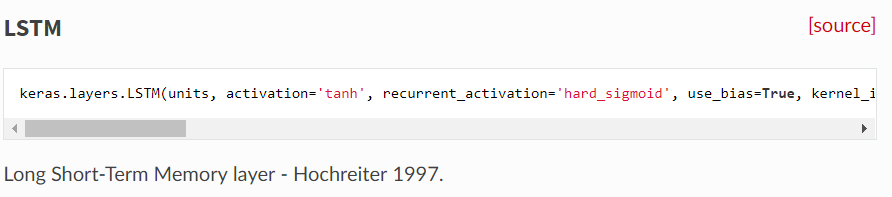

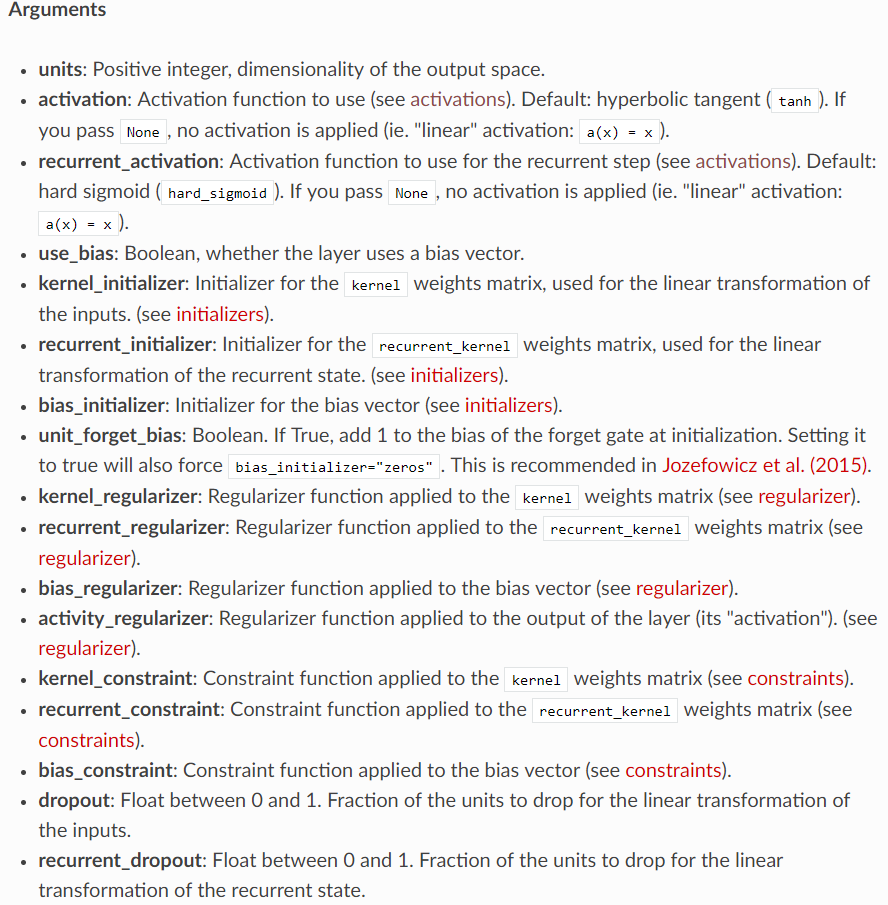

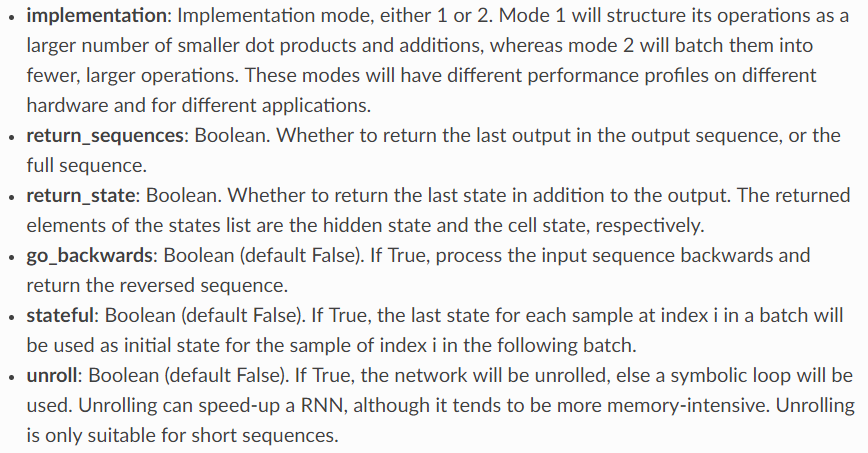

In [ ]:
## One-hot encoding
x = np_utils.to_categorical(x, num_classes = num_classes)
y = np_utils.to_categorical(y, num_classes = num_classes)


# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
y = np.reshape(y, (-1, len(y), data_dim))


In [ ]:
model = Sequential()
model.add(LSTM(num_classess, input_sahpe=(timesteps, data_dim), return_sequences = True)) 
# timestep ; 과거 데이터에 대한 것 # batch에 대한 것도 들어감
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# Store model graph in png
# (Error occurs in python interactive shell)
plot_model(model, to_file= os.path.basename(_file_)+'.png',show_)

In [ ]:
model.compile(loss='categorical_crossentropy', 
             optimizers='rmsprop', metrics = ['accuracy'])  # 회귀를 할 때에는 metrics를 RMSE? 사용
# rmsprop은 시계열에서 많이 사용 # adam은 분류에서 많이 사용
model.fit(x, y, epochs=1)

<주식 데이터>
1. 최근순이므로 과거순으로 sort할 필요 있음
2. 모델을 설계해야함 
3. 단위 확인하기 -> `표준화` 시키기
4. reshape - hidden layer/input/output의 shape?
5. 시간 순대로 train/test 나누기 ex. 과거 2년- training/최근1년-test로 쓰임
6. 훈련 후에는 표준화시킨 데이터를 원데이터로 다시 되돌려놓기
7. RMSE, MSE
8. 시각화


In [86]:
import tensorflow as tf
import numpy as np
# import matplotlib
import os

tf.set_random_seed(777) # reproducibility

import matplotlib.pyplot as plt

# train parameters
seq_length = 7 # 과거 몇개 데이터 사용?
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

xy1 = np.loadtxt('data-02-stock_daily.csv', delimiter = ',')
xy1 = xy1[::-1] # reverse order ( chronically ordered)
min1 = np.min(xy1, 0) # numpy 구조이므로 numpy함수 사용 # 0은 행방향인지 열방향인지 표시
max1 = np.max(xy1, 0)

# 실제 상황에선 가장 이상적인게 train의 mean, max를 test에도 사용하는 것인데 주식은 값이 변동이 쉽게 되기 때문에 맞추기가 어려움
# 따라서, 여기서는 test에 맞춰서 표시하기 힘들므로, train과 test의 mean, max를 사용

xy = (xy1-min1)/(max1-min1) # 원래 단위로 다시 바꾸기 위해서 min, max 저장해놓기

xy[1]
x = xy
y0 = xy[:, -1]
y = xy[:, [-1]] # close as label

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

[[2.13751054e-01 2.08179810e-01 1.91791832e-01 4.66075110e-04
  1.92092403e-01]
 [1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.36419163e-01 1.62682724e-01 5.70171193e-01
  1.47442742e-01]] -> [0.13289962]
[[1.93935034e-01 2.03641926e-01 2.08664571e-01 2.98467330e-03
  1.96551555e-01]
 [2.10516454e-01 2.05289413e-01 2.03558748e-01 2.59926504e-04
  1.87749731e-01]
 [1.86678765e-01 2.09480567e-01 2.08781843e-01 0.00000000e+00
  2.17448151e-01]
 [3.06973882e-01 3.14634137e-01 2.18993665e-01 1.24764722e-02
  2.16981885e-01]
 [2.19142111e-01 2.63907214e-01 2.24686396e-01 4.56323384e-01
  2.24967474e-01]
 [2.33129931e-01 2.3641

 [0.17149616 0.18043171 0.16626255 0.15197634 0.15962527]] -> [0.1805802]
[[0.23380018 0.23326872 0.23240368 0.14799677 0.21897824]
 [0.21042888 0.21474109 0.2229404  0.09448777 0.22237357]
 [0.20282304 0.19907503 0.19710311 0.15993547 0.18203751]
 [0.17627547 0.17968023 0.18521874 0.16248095 0.17087509]
 [0.17152541 0.17456424 0.1845731  0.12384153 0.18349464]
 [0.17149616 0.18043171 0.16626255 0.15197634 0.15962527]
 [0.16406529 0.17595168 0.17148582 0.14636551 0.1805802 ]] -> [0.16988405]
[[0.21042888 0.21474109 0.2229404  0.09448777 0.22237357]
 [0.20282304 0.19907503 0.19710311 0.15993547 0.18203751]
 [0.17627547 0.17968023 0.18521874 0.16248095 0.17087509]
 [0.17152541 0.17456424 0.1845731  0.12384153 0.18349464]
 [0.17149616 0.18043171 0.16626255 0.15197634 0.15962527]
 [0.16406529 0.17595168 0.17148582 0.14636551 0.1805802 ]
 [0.16627989 0.16713578 0.17735455 0.16111858 0.16988405]] -> [0.19512332]
[[0.20282304 0.19907503 0.19710311 0.15993547 0.18203751]
 [0.17627547 0.1796802

 [0.59284042 0.61788788 0.59807839 0.22270324 0.62907789]] -> [0.59687306]
[[0.5177437  0.58941742 0.53173215 0.32275701 0.54079904]
 [0.56011482 0.59349282 0.57093539 0.23573541 0.55831492]
 [0.5255535  0.55892346 0.53201961 0.27033253 0.5553713 ]
 [0.57002287 0.57164133 0.56057696 0.19122524 0.55330215]
 [0.57794917 0.58392557 0.57950373 0.22515909 0.57836636]
 [0.59284042 0.61788788 0.59807839 0.22270324 0.62907789]
 [0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]] -> [0.6072485]
[[0.56011482 0.59349282 0.57093539 0.23573541 0.55831492]
 [0.5255535  0.55892346 0.53201961 0.27033253 0.5553713 ]
 [0.57002287 0.57164133 0.56057696 0.19122524 0.55330215]
 [0.57794917 0.58392557 0.57950373 0.22515909 0.57836636]
 [0.59284042 0.61788788 0.59807839 0.22270324 0.62907789]
 [0.62754741 0.62540287 0.61172331 0.16808282 0.59687306]
 [0.58392324 0.59861172 0.60591312 0.14174061 0.6072485 ]] -> [0.62342384]
[[0.5255535  0.55892346 0.53201961 0.27033253 0.5553713 ]
 [0.57002287 0.5716413

 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]] -> [0.97785024]
[[0.91753068 0.90955899 0.93013248 0.08799857 0.92390372]
 [0.92391259 0.92282604 0.94550876 0.10049296 0.93588207]
 [0.93644323 0.93932734 0.96226395 0.10667742 0.95211558]
 [0.94518557 0.94522671 0.96376051 0.09372591 0.95564213]
 [0.9462346  0.94522671 0.97100833 0.11616922 0.9513578 ]
 [0.94789567 0.94927335 0.97250489 0.11417048 0.96645463]
 [0.95690035 0.95988111 0.9803545  0.14250246 0.97785024]] -> [0.98831302]


array([[2.13751054e-01, 2.08179810e-01, 1.91791832e-01, 4.66075110e-04,
        1.92092403e-01],
       [1.93935034e-01, 2.03641926e-01, 2.08664571e-01, 2.98467330e-03,
        1.96551555e-01],
       [2.10516454e-01, 2.05289413e-01, 2.03558748e-01, 2.59926504e-04,
        1.87749731e-01],
       [1.86678765e-01, 2.09480567e-01, 2.08781843e-01, 0.00000000e+00,
        2.17448151e-01],
       [3.06973882e-01, 3.14634137e-01, 2.18993665e-01, 1.24764722e-02,
        2.16981885e-01],
       [2.19142111e-01, 2.63907214e-01, 2.24686396e-01, 4.56323384e-01,
        2.24967474e-01],
       [2.33129931e-01, 2.36419163e-01, 1.62682724e-01, 5.70171193e-01,
        1.47442742e-01]])

In [87]:
y0.shape

(732,)

In [88]:
# train/test split
# 시간이 중요한 데이터이므로 난수로 지정하는게 아니라 과거는 train, 비교적 최근은 test로 지정
# scikit learn의 train, test split함수는 쓰면안됨
train_size = int(len(dataY)* 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [89]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10, input_shape = (7,5)))
model3.add(tf.keras.layers.Dense(1))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 6, 5)              220       
_________________________________________________________________
time_distributed_9 (TimeDist (None, 6, 5)              30        
_________________________________________________________________
activation_9 (Activation)    (None, 6, 5)              0         
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [90]:
# optimizer = tf.train.AdamOptimizer(Learning_rate)
optimizer = tf.train.AdamOptimizer(0.01)
model3.compile(loss='mean_squared_error', 
              #optimizer='adam',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 
                       'mean_squared_error'])
model3.fit(trainX, trainY, epochs=100)
model3.evaluate(testX, testY)

pred = model3.predict(testX)

Epoch 1/100
507/507 [==============================] - 1s 2ms/sample - loss: 0.0869 - mean_absolute_error: 0.2131 - mean_squared_error: 0.0869
Epoch 2/100
507/507 [==============================] - 0s 482us/sample - loss: 0.0084 - mean_absolute_error: 0.0690 - mean_squared_error: 0.0084
Epoch 3/100
507/507 [==============================] - 0s 509us/sample - loss: 0.0024 - mean_absolute_error: 0.0357 - mean_squared_error: 0.0024
Epoch 4/100
507/507 [==============================] - 0s 480us/sample - loss: 0.0019 - mean_absolute_error: 0.0308 - mean_squared_error: 0.0019
Epoch 5/100
507/507 [==============================] - 0s 498us/sample - loss: 0.0018 - mean_absolute_error: 0.0290 - mean_squared_error: 0.0018 - loss: 0.0015 - mean_absolute_error: 0.0267 - mean_squared_error: 
Epoch 6/100
507/507 [==============================] - 0s 521us/sample - loss: 0.0017 - mean_absolute_error: 0.0283 - mean_squared_error: 0.0017
Epoch 7/100
507/507 [==============================] - 0s 478us/

In [91]:
testY1 = (testY*(max1[-1]-min1[-1]))+min1[-1] # 단위 다시 환산하기
pred1 = (pred*(max1[-1]-min1[-1]))+min1[-1]

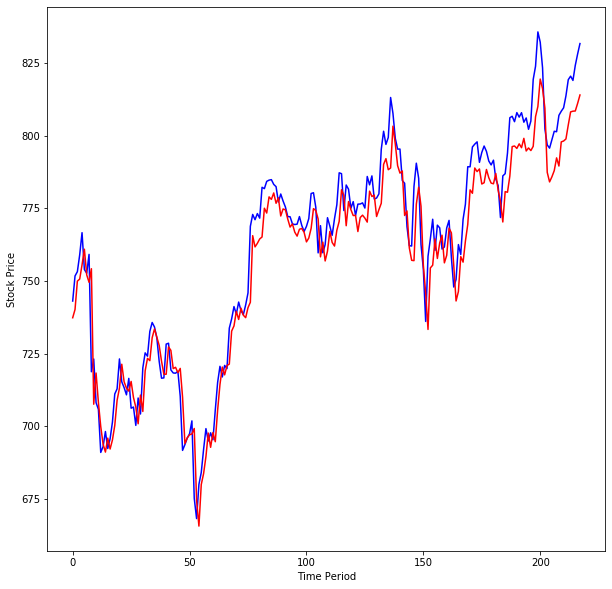

In [92]:
plt.figure(figsize=(10,10))
plt.plot(testY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

In [1]:
import tensorflow as tf
import numpy as np
# import matplotlib
import os

tf.set_random_seed(777) # reproducibility

import matplotlib.pyplot as plt

# train parameters
seq_length = 14 # 과거 몇개 데이터 사용?
data_dim = 10
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

xy1 = np.loadtxt('20190722170807.csv', delimiter = ',',skiprows=1,usecols=(2,3,5,7,10)) # 2,3,4,5,6,7,8,9,10,11
xy1

array([[-3.7, -6.9, -0.4,  0. ,  1.4],
       [-3.2, -7.2,  0.4,  0. ,  1.1],
       [-2.1, -6.8,  2.5,  0. ,  0.9],
       ...,
       [29.1, 24.3, 35.2,  0. ,  1.5],
       [29. , 26.8, 32.3,  0. ,  2.2],
       [25.6, 24.1, 28.7,  6.5,  1.4]])

In [2]:
# xy1 = xy1[::-1] # reverse order ( chronically ordered)
min1 = np.min(xy1, 0) # numpy 구조이므로 numpy함수 사용 # 0은 행방향인지 열방향인지 표시
max1 = np.max(xy1, 0)

# 실제 상황에선 가장 이상적인게 train의 mean, max를 test에도 사용하는 것인데 주식은 값이 변동이 쉽게 되기 때문에 맞추기가 어려움
# 따라서, 여기서는 test에 맞춰서 표시하기 힘들므로, train과 test의 mean, max를 사용

xy = (xy1-min1)/(max1-min1) # 원래 단위로 다시 바꾸기 위해서 min, max 저장해놓기

xy[1]
x = xy
y0 = xy[:, -1]
y = xy[:, [3]] # close as label

y

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.46835443],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02531646],
       [0.        ],
       [0.   

In [13]:
min1

array([-5.6, -9.4, -1.7,  0. ,  0.5])

In [3]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

[[0.05322129 0.06906077 0.03485255 0.         0.5       ]
 [0.06722689 0.06077348 0.05630027 0.         0.33333333]
 [0.09803922 0.0718232  0.11260054 0.         0.22222222]
 [0.14845938 0.13812155 0.15281501 0.         0.22222222]
 [0.10364146 0.1519337  0.08579088 0.         0.44444444]
 [0.10084034 0.12707182 0.1233244  0.         0.22222222]
 [0.14565826 0.1160221  0.16353887 0.         0.16666667]
 [0.10084034 0.11049724 0.09115282 0.         0.66666667]
 [0.05602241 0.05524862 0.06702413 0.         0.27777778]
 [0.16246499 0.16298343 0.14209115 0.         0.27777778]
 [0.24929972 0.29005525 0.2386059  0.         0.16666667]
 [0.25770308 0.27900552 0.26273458 0.         0.16666667]
 [0.21568627 0.1878453  0.24932976 0.         0.16666667]
 [0.22408964 0.22099448 0.19302949 0.         0.        ]] -> [0.]
[[0.06722689 0.06077348 0.05630027 0.         0.33333333]
 [0.09803922 0.0718232  0.11260054 0.         0.22222222]
 [0.14845938 0.13812155 0.15281501 0.         0.22222222]
 [0.1

 [0.8487395  0.85635359 0.79624665 0.         0.38888889]] -> [0.]
[[0.79831933 0.81491713 0.769437   0.         0.38888889]
 [0.86834734 0.80110497 0.87935657 0.         0.5       ]
 [0.88235294 0.85082873 0.89008043 0.         0.55555556]
 [0.88235294 0.88950276 0.8847185  0.         0.5       ]
 [0.89915966 0.83149171 0.92761394 0.         0.44444444]
 [0.8907563  0.87845304 0.84986595 0.         0.33333333]
 [0.87955182 0.86187845 0.8847185  0.01265823 0.38888889]
 [0.85154062 0.89502762 0.84718499 0.         0.44444444]
 [0.82633053 0.82044199 0.77747989 0.03797468 0.33333333]
 [0.83473389 0.86187845 0.79088472 0.         0.72222222]
 [0.83473389 0.82872928 0.83646113 0.         0.55555556]
 [0.85154062 0.84254144 0.84718499 0.         0.61111111]
 [0.8487395  0.85635359 0.79624665 0.         0.38888889]
 [0.87955182 0.81491713 0.92225201 0.         0.44444444]] -> [0.]
[[0.86834734 0.80110497 0.87935657 0.         0.5       ]
 [0.88235294 0.85082873 0.89008043 0.         0.555555

array([[0.05322129, 0.06906077, 0.03485255, 0.        , 0.5       ],
       [0.06722689, 0.06077348, 0.05630027, 0.        , 0.33333333],
       [0.09803922, 0.0718232 , 0.11260054, 0.        , 0.22222222],
       [0.14845938, 0.13812155, 0.15281501, 0.        , 0.22222222],
       [0.10364146, 0.1519337 , 0.08579088, 0.        , 0.44444444],
       [0.10084034, 0.12707182, 0.1233244 , 0.        , 0.22222222],
       [0.14565826, 0.1160221 , 0.16353887, 0.        , 0.16666667],
       [0.10084034, 0.11049724, 0.09115282, 0.        , 0.66666667],
       [0.05602241, 0.05524862, 0.06702413, 0.        , 0.27777778],
       [0.16246499, 0.16298343, 0.14209115, 0.        , 0.27777778],
       [0.24929972, 0.29005525, 0.2386059 , 0.        , 0.16666667],
       [0.25770308, 0.27900552, 0.26273458, 0.        , 0.16666667],
       [0.21568627, 0.1878453 , 0.24932976, 0.        , 0.16666667],
       [0.22408964, 0.22099448, 0.19302949, 0.        , 0.        ]])

In [4]:
# train/test split
# 시간이 중요한 데이터이므로 난수로 지정하는게 아니라 과거는 train, 비교적 최근은 test로 지정
# scikit learn의 train, test split함수는 쓰면안됨
train_size = int(len(dataY)* 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

In [12]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10, input_shape = (14,5) ))#,return_sequences = True
#model3.add(tf.keras.layers.LSTM(10))
model3.add(tf.keras.layers.Dense(1))

# optimizer = tf.train.AdamOptimizer(Learning_rate)
optimizer = tf.train.RMSPropOptimizer(0.001)
model3.compile(loss='mean_squared_error', 
              #optimizer='adam',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 
                       'mean_squared_error'])

model3.fit(trainX, trainY, epochs=50, batch_size=5)
model3.evaluate(testX, testY)

pred = model3.predict(testX)

Epoch 1/50
131/131 [==============================] - 2s 12ms/sample - loss: 0.0283 - mean_absolute_error: 0.1495 - mean_squared_error: 0.0283
Epoch 2/50
131/131 [==============================] - 1s 7ms/sample - loss: 0.0163 - mean_absolute_error: 0.0998 - mean_squared_error: 0.0163
Epoch 3/50
131/131 [==============================] - 1s 7ms/sample - loss: 0.0127 - mean_absolute_error: 0.0783 - mean_squared_error: 0.0127
Epoch 4/50
131/131 [==============================] - 1s 7ms/sample - loss: 0.0110 - mean_absolute_error: 0.0697 - mean_squared_error: 0.0110
Epoch 5/50
131/131 [==============================] - 1s 7ms/sample - loss: 0.0097 - mean_absolute_error: 0.0613 - mean_squared_error: 0.0097
Epoch 6/50
131/131 [==============================] - 1s 7ms/sample - loss: 0.0089 - mean_absolute_error: 0.0571 - mean_squared_error: 0.0089
Epoch 7/50
131/131 [==============================] - 1s 9ms/sample - loss: 0.0086 - mean_absolute_error: 0.0523 - mean_squared_error: 0.0086
Epoch

In [14]:
testY1 = (testY*(max1[3]-min1[3]))+min1[3] # 단위 다시 환산하기
pred1 = (pred*(max1[3]-min1[3]))+min1[3]

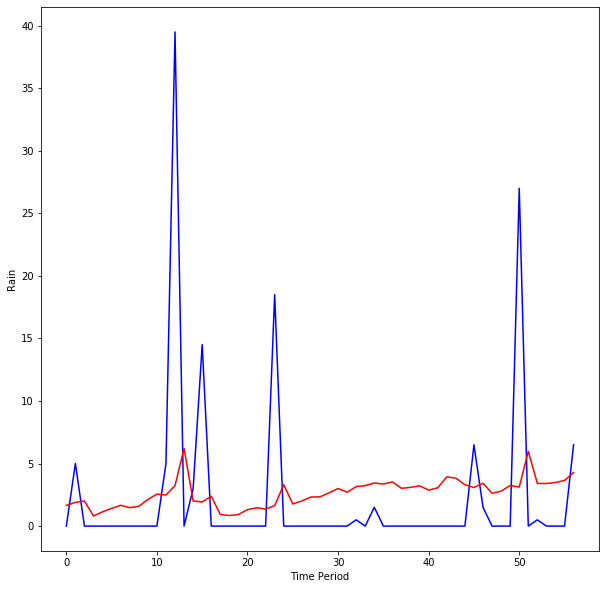

In [15]:
plt.figure(figsize=(10,10))
plt.plot(testY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Period")
plt.ylabel("Rain")
plt.show()

In [12]:
import codecs
from konlpy.tag import Okt

readFp=codecs.open("C:/Users/Affinity/Desktop/kowiki/wiki.wp2txt", "r", encoding="utf-16")
gubun_file="wiki.gubun"

writeFp=open(gubun_file, "w", encoding="utf-8") #새로 저장. 글자를 전체다 사용하는게 아니라 정리된 데이터만 사용하려고 함

okt=Okt()

i=0

while True: # 정확한 line수를 모르다 보니 while문을 활용하여 끝까지 읽도록 유도
    line=readFp.readline()
    if not line:break
    if i%20000==0:
        print("current - "+str(i))
            
    i+=1
    
    malist=okt.pos(line, norm=True, stem=True) # pos : 품사 단위로 체크 # return : 단어,품사
    r=[]
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            writeFp.write(word[0]+" ")
        
writeFp.close()

current - 0
current - 20000
current - 40000
current - 60000
current - 80000
current - 100000
current - 120000
current - 140000
current - 160000
current - 180000
current - 200000
current - 220000
current - 240000
current - 260000
current - 280000
current - 300000
current - 320000
current - 340000
current - 360000
current - 380000
current - 400000
current - 420000
current - 440000
current - 460000
current - 480000
current - 500000
current - 520000
current - 540000
current - 560000
current - 580000
current - 600000
current - 620000
current - 640000
current - 660000
current - 680000
current - 700000
current - 720000
current - 740000
current - 760000
current - 780000
current - 800000
current - 820000
current - 840000
current - 860000
current - 880000
current - 900000
current - 920000
current - 940000
current - 960000
current - 980000
current - 1000000
current - 1020000
current - 1040000
current - 1060000
current - 1080000
current - 1100000
current - 1120000
current - 1140000
current - 11600

current - 9180000
current - 9200000
current - 9220000
current - 9240000
current - 9260000
current - 9280000
current - 9300000
current - 9320000
current - 9340000
current - 9360000
current - 9380000
current - 9400000
current - 9420000
current - 9440000
current - 9460000
current - 9480000
current - 9500000
current - 9520000
current - 9540000
current - 9560000
current - 9580000
current - 9600000
current - 9620000
current - 9640000
current - 9660000
current - 9680000
current - 9700000
current - 9720000
current - 9740000
current - 9760000
current - 9780000
current - 9800000
current - 9820000
current - 9840000
current - 9860000
current - 9880000
current - 9900000
current - 9920000
current - 9940000
current - 9960000
current - 9980000
current - 10000000
current - 10020000
current - 10040000
current - 10060000
current - 10080000
current - 10100000
current - 10120000
current - 10140000
current - 10160000
current - 10180000
current - 10200000
current - 10220000
current - 10240000
current - 10260

current - 17860000
current - 17880000
current - 17900000
current - 17920000
current - 17940000
current - 17960000
current - 17980000
current - 18000000
current - 18020000
current - 18040000
current - 18060000
current - 18080000
current - 18100000
current - 18120000
current - 18140000
current - 18160000
current - 18180000
current - 18200000
current - 18220000
current - 18240000
current - 18260000
current - 18280000
current - 18300000
current - 18320000
current - 18340000
current - 18360000
current - 18380000
current - 18400000
current - 18420000
current - 18440000
current - 18460000
current - 18480000
current - 18500000
current - 18520000
current - 18540000
current - 18560000
current - 18580000
current - 18600000
current - 18620000
current - 18640000
current - 18660000
current - 18680000
current - 18700000
current - 18720000
current - 18740000
current - 18760000
current - 18780000
current - 18800000
current - 18820000
current - 18840000
current - 18860000
current - 18880000
current - 18

In [1]:
from gensim.models import word2vec

In [6]:
from gensim.models import word2vec
# 코퍼스 읽어 들이기
sentences = word2vec.Text8Corpus('./wiki.gubun')

# Corpus를 먼저 완성한 후(목록집) 모델을 만들어야합니다

# 모델 만들기
model = word2vec.Word2Vec(sentences, sg=1, size=100, window=5) 
#sg=1 : skipgram, sg=0 : CBOW # window : 앞뒤 몇개 볼건지 사이즈가 너무 크면 차원이 높아지기때문에 컴이 힘들어함 

# 모델 저장하기
model.save("./wiki.model")

KeyboardInterrupt: 

In [2]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load("./wiki/wiki.model")
results = model.wv.most_similar(positive=["과자"])

for result in results:
    print(result)

('후식', 0.8487750291824341)
('아이스크림', 0.8437435030937195)
('국물', 0.8402103185653687)
('짬뽕', 0.8347973823547363)
('빵류', 0.8293800354003906)
('짜장', 0.8293166756629944)
('면류', 0.8273177742958069)
('식혜', 0.8263230919837952)
('단무지', 0.8227368593215942)
('닭고기', 0.8198260068893433)


In [3]:
model = word2vec.Word2Vec.load("./wiki/wiki.model")
results = model.wv.most_similar(positive=["왕자", "여성"], negative=['남성'])

for result in results:
    print(result)

('왕세자', 0.6126681566238403)
('아들', 0.6097202897071838)
('나디아', 0.6095216274261475)
('미들턴', 0.607495129108429)
('왕비', 0.6049408316612244)
('여왕', 0.6040862798690796)
('공녀', 0.5968351364135742)
('요르요스', 0.5946363210678101)
('이사벨', 0.5944206714630127)
('장미전쟁', 0.5896583795547485)


In [5]:
model = word2vec.Word2Vec.load("./wiki/wiki.model")
results = model.wv.most_similar(positive=["왕자", "여성"]), negative=['남성'])

for result in results:
    print(result)

('매춘부', 0.7174502611160278)
('털털', 0.7016446590423584)
('누이', 0.6927659511566162)
('카디자', 0.6926500797271729)
('위탄', 0.6900252103805542)
('왕녀', 0.688942551612854)
('바람기', 0.6882281303405762)
('지아비', 0.6879292726516724)
('루페스쿠', 0.6875244379043579)
('구드룬', 0.6853964328765869)


In [11]:
from konlpy.tag import Okt
from gensim.models import word2vec

model = word2vec.Word2Vec.load("./wiki/wiki.model")
okt = Okt()
def print_emergency(text): 
    print(text)
    # 전달된 문장을 형태소 분석하기
    node = okt.pos(text, norm=True, stem=True)
    for word, form in node:
        # 필요한 형태소만 추출하기
        if form == "Noun" or form =="Verb" or form =="Adjective" or form =="Adverb":
            # 급하다와 비슷한 단어
            print("-", word, ":", model.wv.similarity(word, "급하다"))
            
print_emergency("컴퓨터에 문제가 생겼어요. 빨리 해결해야 하는 문제가 있어서 지원 요청합니다.")
print_emergency("사용 방법을 잘 모르겠습니다.")

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


컴퓨터에 문제가 생겼어요. 빨리 해결해야 하는 문제가 있어서 지원 요청합니다.
- 컴퓨터 : 0.13914135
- 문제 : 0.41508192
- 생기다 : 0.5106134
- 빨리 : 0.6063097
- 해결 : 0.35062572
- 하다 : 0.5127294
- 하다 : 0.5127294
- 문제 : 0.41508192
- 있다 : 0.40812844
- 지원 : 0.21296962
- 요청 : 0.4328099
- 하다 : 0.5127294
사용 방법을 잘 모르겠습니다.
- 사용 : 0.13949278
- 방법 : 0.30189905
- 자다 : 0.43546894
- 모르다 : 0.50230193


In [11]:
from konlpy.tag import Okt
from gensim.models import word2vec
import numpy as np

model = word2vec.Word2Vec.load("./wiki/wiki.model")
okt = Okt()
def print_emergency(text): 
    list=[]
    print(text)
    # 전달된 문장을 형태소 분석하기
    node = okt.pos(text, norm=True, stem=True)
    for word, form in node:
        # 필요한 형태소만 추출하기
        if form == "Noun" or form =="Verb" or form =="Adjective" or form =="Adverb": #if form in ['Noun', 'Verb', 'Adjective', 'Adverb']:
            # 급하다와 비슷한 단어
            #print("-", word, ":", model.wv.similarity(word, "급하다"))
            list.append(model.wv.similarity(word, "급하다"))
    #print(list)
    print(np.mean(list))
            
print_emergency("컴퓨터에 문제가 생겼어요. 빨리 해결해야 하는 문제가 있어서 지원 요청합니다.")
print_emergency("사용 방법을 잘 모르겠습니다.")

컴퓨터에 문제가 생겼어요. 빨리 해결해야 하는 문제가 있어서 지원 요청합니다.
- 컴퓨터 : 0.13914135
- 문제 : 0.41508192
- 생기다 : 0.5106134
- 빨리 : 0.6063097
- 해결 : 0.35062572
- 하다 : 0.5127294
- 하다 : 0.5127294
- 문제 : 0.41508192
- 있다 : 0.40812844
- 지원 : 0.21296962
- 요청 : 0.4328099
- 하다 : 0.5127294
[0.13914135, 0.41508192, 0.5106134, 0.6063097, 0.35062572, 0.5127294, 0.5127294, 0.41508192, 0.40812844, 0.21296962, 0.4328099, 0.5127294]
0.4190792
사용 방법을 잘 모르겠습니다.
- 사용 : 0.13949278
- 방법 : 0.30189905
- 자다 : 0.43546894
- 모르다 : 0.50230193
[0.13949278, 0.30189905, 0.43546894, 0.50230193]
0.34479067


In [4]:
list=[1,2,3,4]
import numpy as np
np.mean(list)

2.5

In [1]:
import codecs
from bs4 import BeautifulSoup
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random, sys

Using TensorFlow backend.


In [26]:
fp = codecs.open("./BEXX0003.txt", "r", encoding="utf-16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body")
text = body.getText() + " " # 단어별로 자르는것은 다른 기법 활용
print("코퍼스의 길이: ", len(text))

chars = sorted(list(set(text)))
print("사용되고 있는 문자의 수:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# one-hot encoding 할 예정
# 텍스트를 maxlen개의 문자로 자르고 다음에 오는 문자 등록하기
maxlen = 20
step = 3
sentences = []
next_chars = []
for i in range(0, len(text)- maxlen, step):
    sentences.append(text[i:i+maxlen])
    next_chars.append(text[i+maxlen])
print("학습할 구문의 수:", len(sentences))
print("텍스트를 ID 벡터로 변환합니다...")

코퍼스의 길이:  311682
사용되고 있는 문자의 수: 1692
학습할 구문의 수: 103888
텍스트를 ID 벡터로 변환합니다...


In [14]:
# one-hot encoding
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]]=1
    y[i, char_indices[next_chars[i]]]=1


In [28]:
sentences

['\n\n제1편 어둠의 발소리\n서(序)\n1',
 '1편 어둠의 발소리\n서(序)\n1897',
 '어둠의 발소리\n서(序)\n1897년의 ',
 ' 발소리\n서(序)\n1897년의 한가위',
 '리\n서(序)\n1897년의 한가위.\n까',
 '(序)\n1897년의 한가위.\n까치들이',
 '\n1897년의 한가위.\n까치들이 울타',
 '97년의 한가위.\n까치들이 울타리 안',
 '의 한가위.\n까치들이 울타리 안 감나',
 '가위.\n까치들이 울타리 안 감나무에 ',
 '\n까치들이 울타리 안 감나무에 와서 ',
 '들이 울타리 안 감나무에 와서 아침 ',
 '울타리 안 감나무에 와서 아침 인사를',
 ' 안 감나무에 와서 아침 인사를 하기',
 '감나무에 와서 아침 인사를 하기도 전',
 '에 와서 아침 인사를 하기도 전에, ',
 '서 아침 인사를 하기도 전에, 무색 ',
 '침 인사를 하기도 전에, 무색 옷에 ',
 '사를 하기도 전에, 무색 옷에 댕기꼬',
 '하기도 전에, 무색 옷에 댕기꼬리를 ',
 ' 전에, 무색 옷에 댕기꼬리를 늘인 ',
 ', 무색 옷에 댕기꼬리를 늘인 아이들',
 '색 옷에 댕기꼬리를 늘인 아이들은 송',
 '에 댕기꼬리를 늘인 아이들은 송편을 ',
 '기꼬리를 늘인 아이들은 송편을 입에 ',
 '를 늘인 아이들은 송편을 입에 물고 ',
 '인 아이들은 송편을 입에 물고 마을길',
 '이들은 송편을 입에 물고 마을길을 쏘',
 ' 송편을 입에 물고 마을길을 쏘다니며',
 '을 입에 물고 마을길을 쏘다니며 기뻐',
 '에 물고 마을길을 쏘다니며 기뻐서 날',
 '고 마을길을 쏘다니며 기뻐서 날뛴다.',
 '을길을 쏘다니며 기뻐서 날뛴다. 어른',
 ' 쏘다니며 기뻐서 날뛴다. 어른들은 ',
 '니며 기뻐서 날뛴다. 어른들은 해가 ',
 '기뻐서 날뛴다. 어른들은 해가 중천에',
 ' 날뛴다. 어른들은 해가 중천에서 좀',
 '다. 어른들은 해가 중천에서 좀 기울',
 '어른들은 해가 중천에서 좀 기울어질 ',
 '은 

In [15]:
# 모델 구축하기(LSTM)
print("모델을 구축합니다...")
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

모델을 구축합니다...


In [16]:
# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum( exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [47]:
probas

array([[0, 0, 1, 0]])

In [29]:
temperature=1.0

In [49]:
preds = model.predict(x, verbose=0)[0]
preds

array([4.2051042e-04, 5.2308049e-03, 8.3098326e-05, ..., 1.4274238e-09,
       1.4268196e-09, 3.9291743e-09], dtype=float32)

In [42]:
preds=np.array([0.4, 0.3, 0.2, 0.1])
preds

array([0.4, 0.3, 0.2, 0.1])

In [43]:
preds = np.asarray(preds).astype('float64')
preds

array([0.4, 0.3, 0.2, 0.1])

In [44]:
exp_preds = np.exp(preds)
exp_preds

array([1.4918247 , 1.34985881, 1.22140276, 1.10517092])

In [45]:
preds = exp_preds / np.sum( exp_preds)
preds

array([0.28865141, 0.26118259, 0.23632778, 0.21383822])

In [46]:
probas = np.random.multinomial(1, preds, 1)
probas

array([[0, 0, 1, 0]])

In [ ]:
preds = np.log(preds) / temperature
exp_preds = np.exp(preds)
preds = exp_preds / np.sum( exp_preds)
probas = np.random.multinomial(1, preds, 1)

In [17]:
# 학습시키고 텍스트 생성하기 반복
for iteration in range(1, 60):
    print()
    print('-' * 50)
    print('반복 =', iteration)
    model.fit(X, y, batch_size=128, nb_epoch=1) # 
    # 임의의 시작 텍스트 선택하기
    start_index = random.randint(0, len(text) - maxlen - 1)
    # 다양한 다양성의 문장 생성
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print()
        print('--- 다양성 = ', diversity)
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('--- 시드 = "' + sentence + '"')
        sys.stdout.write(generated) # print문 개행제거
        # 시드를 기반으로 텍스트 자동 생성
        for i in range(400):
            x = np.zeros((1, maxlen, len(chars))) # X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
            for t, char in enumerate(sentence):
                x[0, t, char_indices[char]] = 1.
            # 다음에 올 문자를 예측하기
            preds = model.predict(x, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            # 출력하기
            generated += next_char
            sentence = sentence[1:] + next_char # 보정해준 값을 넣어주는 식으로 생각할 수도 있다!!
            sys.stdout.write(next_char) # print문 개행제거
            sys.stdout.flush()
        print()


--------------------------------------------------
반복 = 1


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1
103888/103888 [==============================] - 53s 512us/step - loss: 3.8331

--- 다양성 =  0.2
--- 시드 = "수록 한심하지. 종살이도 오래 하니께"
수록 한심하지. 종살이도 오래 하니께 아이 아니 아이 아니가 아니 아이 이 그래 그리 없는데 아이 아니 아이 아니 아이 아니가."
"그러믄 그래서 그러나 그는 그래 그래 그는 사람이 아니 아이 아니 아니 아이 아니 아이 아니 아이 아니 아이 아니 아니 아이 아니 아니가."
"그래서 그 사람이 아니 아이 아니 그래 그래 그래서 그는 그 사람이 아니 아이 아니가 아니 아이 아니 아니 아이 아니가."
"그리 그래서 그래서 그래서 그래서 그래서 그 사람이 아니 마음이 아니가 아니 아니 아이 아니 아니 아니 아이 아니 아이 아니 아이 아니 아이 아니가."
"그래서 그래서 그래서 그러나 그는 그 말이 아니 아이 아니 아니 아이 없이 아니 아이 아니 아니 아이 아니 아이 아니 아니 아이 아니 아니 아니 아니 아이 아니 아니 아이 아니 아니 아이 아니 아이

--- 다양성 =  0.5
--- 시드 = "수록 한심하지. 종살이도 오래 하니께"
수록 한심하지. 종살이도 오래 하니께."
"그 이기 사람이 아니 안 마음에서 나는 일이라 지도 아니 아이 다시 그래 일이 있었다. 그러나 그 말이 아니 아이 다 사람이 되어서 적에서 긴데 남은 비 치수는 일 지요."
"이 아니가 로 아니 아이 아니요."
"그리 아니 사람이 아니 하나 아니가 그래 그래서 그는 두만네 자기 사람이 아이 돌아가리 카나."
"그래서 가은 그리 그래서 그러믄 그 지도 아니가."
"그래 그래 한 사람이 아니 바라 오나 가지 마님에 이대 아니 가지 않는데 그리 다고 안 가는 거리 아니다 아니 일이야 아니 아니 아이 아니 이 할 일이요?"
"아이 다 말이요."
"사람이 오겄 모양이 아니 아이, 아이 말이요."
"그래 이야 내가 그러믄 나이 지고 그 기요."
"그 여자서 그래서 

또 말재주라고는 없던 월선이가 그런 것 같은 것이 아니었다.
"그래?"
"그러믄 그 말이요."
"그러믄 그 말이요."
"그러믄 그 말이요."
"그러믄 그 말이요."
"그러믄 그 말이요."
"그러믄 그 말이요."
"그런 모양이다. 그러나 그러나 그 말을 하며 마음을 하며 말했다.
"그래 그 말이요. 그러나 그 말이요. 아무리 그러나 그 말이 없다. 그러나 그는 일이 없는 것이 아니었다.
"그러믄 그 말이 없지. 그 말이요."
"그런 말이요."
"그렇지. 그러나 그는 일이 없는 모양이었다.
"그러믄 그 말이요."
"그러믄 그 말이요."
"그렇지. 그 말이 없이믄 그러나 그 말이 없지요.'
"그래?"
"그러믄 그 말이요."
"그러믄 그 아이들이 그 말이지. 그러나 그러나 그 말을 하는 것이 아니었다.
"그래?"
"그러믄 그 말이요."
"그런 일이 

--- 다양성 =  0.5
--- 시드 = "또 말재주라고는 없던 월선이가 그런 "
또 말재주라고는 없던 월선이가 그런 것이 양반에 느리고 가서 그 혼자 무신 우리 모양이나 바람 들어서 나서 가서 아니가 사람 사람을 내구 쪽으로 들어 못하는 것이 삼수 있었다.
"아니가?"
"그래?"
"그렇지요."
"그러믄 그 말이요."
"그런 동안 그러는 것은 아니었다. 사그 바람  불안에 관한 것도 아니었다.
"그렇지 않소. 그리 말이요?"
"그러니께 그러면 그 일이 없는 일이라도 한시 하는 말을 따라 그 말이 없었다.
"그런 모양이 없지. 죽는 자식이 머가 있지. 그러니 그 여기가 하기도 하는 것이 아니었다.
"아무리 어디서 나서 우리 자아로 나서 있고 바지도 떠나고 살아가 가서 그 천소리 로 어지고 오는 수 없는 것이 아니었다.
"무신 여인을 사는 달아가?"
"그러니께 어디서 그 일이 없다. 아이들은 소리를 들고 있었다.
"그런 강포수

--- 다양성 =  1.0
--- 시드 = "또 말재주라고는 없던 월선이가 그런 "
또 말재주라고는 없던 월선이가 그런 최치수가 서하면 하나. 카이는 양할 수 없는 악매를 마을 주질러앉는다.
"그

"그러다가 그런 일이다. 그런 일이 없었다. 그러나 그는 그 말이다. 그러나 그는 그 말을 했다. 그러나 그런 일이 있었다. 그러나 그는 그 말이다. 그런 기이 없고 그 말이다. 그러나 그러나 그러나 이러나 있었다. 그러나 그는 소나가 들어섰다.
"그러지. 그러나 그러나 이상 들어가는 것 같았다.
"그런 기이 없고 어디 있어, 그 자네가 그 말이다. 그런 말이 있다 그 말이다. 그러나 그는 그 말이다. 그런 거 없이 아니었고 자신이 어디 있었다 카더라."
"그런데 나 오늘 말이 없고 있는 것도 아니었다. 그러나 그는 그 말을 했다. 그는 그러나 그러나

--- 다양성 =  0.5
--- 시드 = "절에?"
"연곡사 혜관스님이."
구천"
절에?"
"연곡사 혜관스님이."
구천이의 얼굴을 오느니 그는 그러나 아무하고 준구의 어색어서 평산은 어미가 먹고 있었다.
"아니 그것도 없이믄 이상 사람도 없는 일이다. 그러고는 일 하나 나라의 어디 있이믄 우리 한 것이 있다 그 말이다. 그런 일이 없었다. 그런 일이 있는 것은 그만나도 하나 카는 것도 아니다. 그러나 그런 거 없이 그만한 일이 있었다는 것은 아니다. 그러나 그런 일이다. 어디 속에서 강포수는 그런 일 아닌 것 같다. 있는 것 같은 것이다.
"그러니까 들판은 그래야 아니믄 그것도 아니가."
"누구 하나 내 사람 사나이 불이 있어서 그러는 것도 생각하니 서희를 며느러기 고. 있었다.
"그, 그러요. 아이들이 미음한 이마음이 나 들어가고 있었다. 대꾸가  , 일어마는 삼수가 주막에 한다. 사리의 조리 어디 있는 에미가 아니다. 

--- 다양성 =  1.0
--- 시드 = "절에?"
"연곡사 혜관스님이."
구천"
절에?"
"연곡사 혜관스님이."
구천이의 준구의 살이를 애'로 화심 앉아 하는데
"알 지우는 심분이가!"
"이랑! 요자여 할작게 돼서 한 마라. 김개주로 얼굴을 올라가는데 내가 그래도 개 기월 물린다.
공연속에서 그은 오늘어서 열자를 막번어놓고 동여기 만것님이 른릇에 나타묵고 영역과 윤씨부인의 윤보의 집요

KeyboardInterrupt: 

In [48]:
preds

array([0.28865141, 0.26118259, 0.23632778, 0.21383822])

In [18]:
model.fit(X, y, batch_size=128, nb_epoch=1)

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1
103888/103888 [==============================] - 56s 539us/step - loss: 2.6332


In [19]:
start_index = random.randint(0, len(text) - maxlen - 1)
start_index

278380

In [20]:
generated = ''
sentence = text[start_index: start_index + maxlen]
generated += sentence

In [22]:
print(sentence)
generated

." 두만아비는 소를 몰고 오다가 채


'." 두만아비는 소를 몰고 오다가 채'

In [25]:
for i in range(10):
    x = np.zeros((1, maxlen, len(chars))) # X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
    for t, char in enumerate(sentence):
        x[0, t, char_indices[char]] = 1.
    # 다음에 올 문자를 예측하기
    preds = model.predict(x, verbose=0)[0]
    next_index = sample(preds, diversity)
    next_char = indices_char[next_index]
    # 출력하기
    generated += next_char
    sentence = sentence[1:] + next_char
    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

 아니다. 그 기이
